# Appendix of Trappenberg book
## Information of theory of neuron
### Entropy of poisson spike

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

* show poisson distribuion
   - mean and variation = 2
   - sample 10000 times

(array([1.366e+03, 2.676e+03, 2.720e+03, 1.805e+03, 9.250e+02, 3.520e+02,
        1.200e+02, 2.700e+01, 7.000e+00, 2.000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

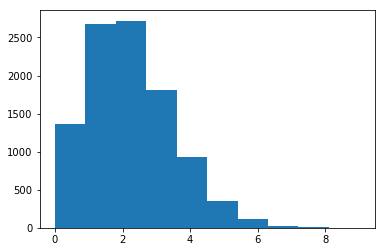

In [63]:
N = np.random.poisson(2, 10000)
plt.hist(N)

* The distribution of poisson distribution following equation

$$ P(n) = \frac{N^{n}e^{N}}{n!} $$

* Entropy 
$$ H = - \sum_{n}{P(n)log_{2}P(n)} $$
$$ = - \frac{1}{ln2}\sum_{n}{P(n)lnP(n)} $$

* However the page 352 of the book they conluded by the Striling's approximation

$$ H = \frac{1}{2}log_{2}{N} - \frac{1}{2}log_{2}{2\pi} $$

* If following there conclusion, we get

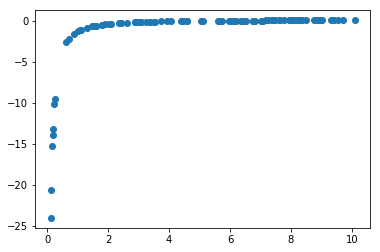

In [82]:
epsilon = 0.1
R = np.random.rand(100) * 10 + epsilon 
Y1 = (np.log2(R) - np.log2(np.pi*2))/(2 * R)
plt.scatter(R, Y1)

* This is not what we looking for, like the figure D.4B.

https://www.jstor.org/stable/2030812?seq=1#page_scan_tab_contents
https://pure.tue.nl/ws/files/1959440/Metis199989.pdf

* Above reference using follow equation

$$ H = \frac{1}{2}log_{2}{2\pi eN} - \frac{1}{12N} + O(N^{-2}) $$

or

$$ H = \frac{1}{2}log_{2}{2\pi eN} - \sum_{n = 1} {a_{n}(n-1)!N^{-n} }$$

anyway the first factor seems important.

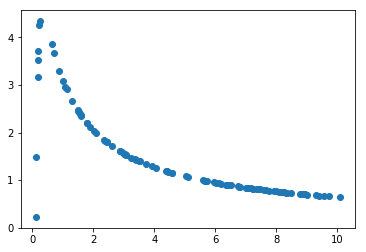

In [83]:

Y2 = (np.log2(np.pi*R*np.exp(1)))/(R)
plt.scatter(R, Y2)

* making possion probabilty distribution 

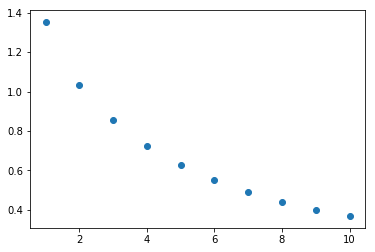

In [142]:
entropy_per_spike = []
spike_count = []
for pois_N in range(1, 11):
    entropy_sum = 0
    for i in range(1,101):
        prob = pois_N ** i * np.exp(-pois_N)/(np.math.factorial(i))
        log_prob = np.log2(prob)
        entropy_each = - prob * log_prob
        entropy_sum = entropy_sum + entropy_each
    entropy_per_spike.append(entropy_sum/pois_N)
    spike_count.append(pois_N)
    
plt.scatter(spike_count, entropy_per_spike)
